In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('data/train.csv')

In [37]:
df.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [ ]:
df_depth = df.copy()

In [38]:
def depth(x,y,z):
    a= z / ((x + y)/2)
    return a

In [40]:
for i in range(len(df)):
    df['depth'][i] = depth(df['x'][i],df['y'][i],df['z'][i])

In [42]:
df_depth = df.copy()

In [49]:
df_depth['depth_old'] = df['depth']/100

In [50]:
df_depth.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price,depth_old
0,0,0.30,Premium,D,SI2,0.623981,58.0,4.31,4.28,2.68,6.353,0.624
1,1,1.01,Ideal,E,VVS2,0.627329,56.0,6.42,6.46,4.04,9.183,0.627
2,2,0.72,Ideal,F,VS2,0.618341,59.0,5.71,5.74,3.54,7.983,0.618
3,3,1.08,Very Good,G,SI2,0.631902,57.0,6.54,6.50,4.12,8.371,0.632
4,4,0.36,Premium,G,VS1,0.623204,59.0,4.50,4.55,2.82,6.588,0.623


In [72]:
df_depth_2 = abs(df_depth['depth_old'] - df_depth['depth']) > 0.01

In [73]:
dubious = df_depth_2[df_depth_2 == True].index

In [69]:
ai= df_depth[(abs(df_depth['depth_old'] - df_depth['depth'])*100)/df_depth['depth_old']>=0.05]

In [70]:
ai.shape

(17105, 12)

In [71]:
df_depth.drop(df_depth.index[[dubious]], inplace=True)

In [75]:
df_depth.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price,depth_old
0,0,0.30,Premium,D,SI2,0.623981,58.0,4.31,4.28,2.68,6.353,0.624
1,1,1.01,Ideal,E,VVS2,0.627329,56.0,6.42,6.46,4.04,9.183,0.627
2,2,0.72,Ideal,F,VS2,0.618341,59.0,5.71,5.74,3.54,7.983,0.618
3,3,1.08,Very Good,G,SI2,0.631902,57.0,6.54,6.50,4.12,8.371,0.632
4,4,0.36,Premium,G,VS1,0.623204,59.0,4.50,4.55,2.82,6.588,0.623


In [76]:
df_depth.drop(['id','x','y','z', 'depth_old'],axis=1,inplace=True)

In [77]:
df_depth.head(5)

,carat,cut,color,clarity,depth,table,price
0,0.30,Premium,D,SI2,0.623981,58.0,6.353
1,1.01,Ideal,E,VVS2,0.627329,56.0,9.183
2,0.72,Ideal,F,VS2,0.618341,59.0,7.983
3,1.08,Very Good,G,SI2,0.631902,57.0,8.371
4,0.36,Premium,G,VS1,0.623204,59.0,6.588


In [79]:
oi = df_depth[df_depth['depth'] == 0]

In [80]:
oi.shape

(0, 7)

In [82]:
df_depth.shape

(40386, 7)

In [21]:
df.shape

(40455, 7)

In [83]:
df_depth.duplicated().sum()

115

In [84]:
df_depth.drop_duplicates(inplace=True)

In [85]:
df_depth.duplicated().sum()

0

In [86]:
df_depth.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      5
table      0
price      0
dtype: int64

In [87]:
df_depth.dropna(inplace=True)

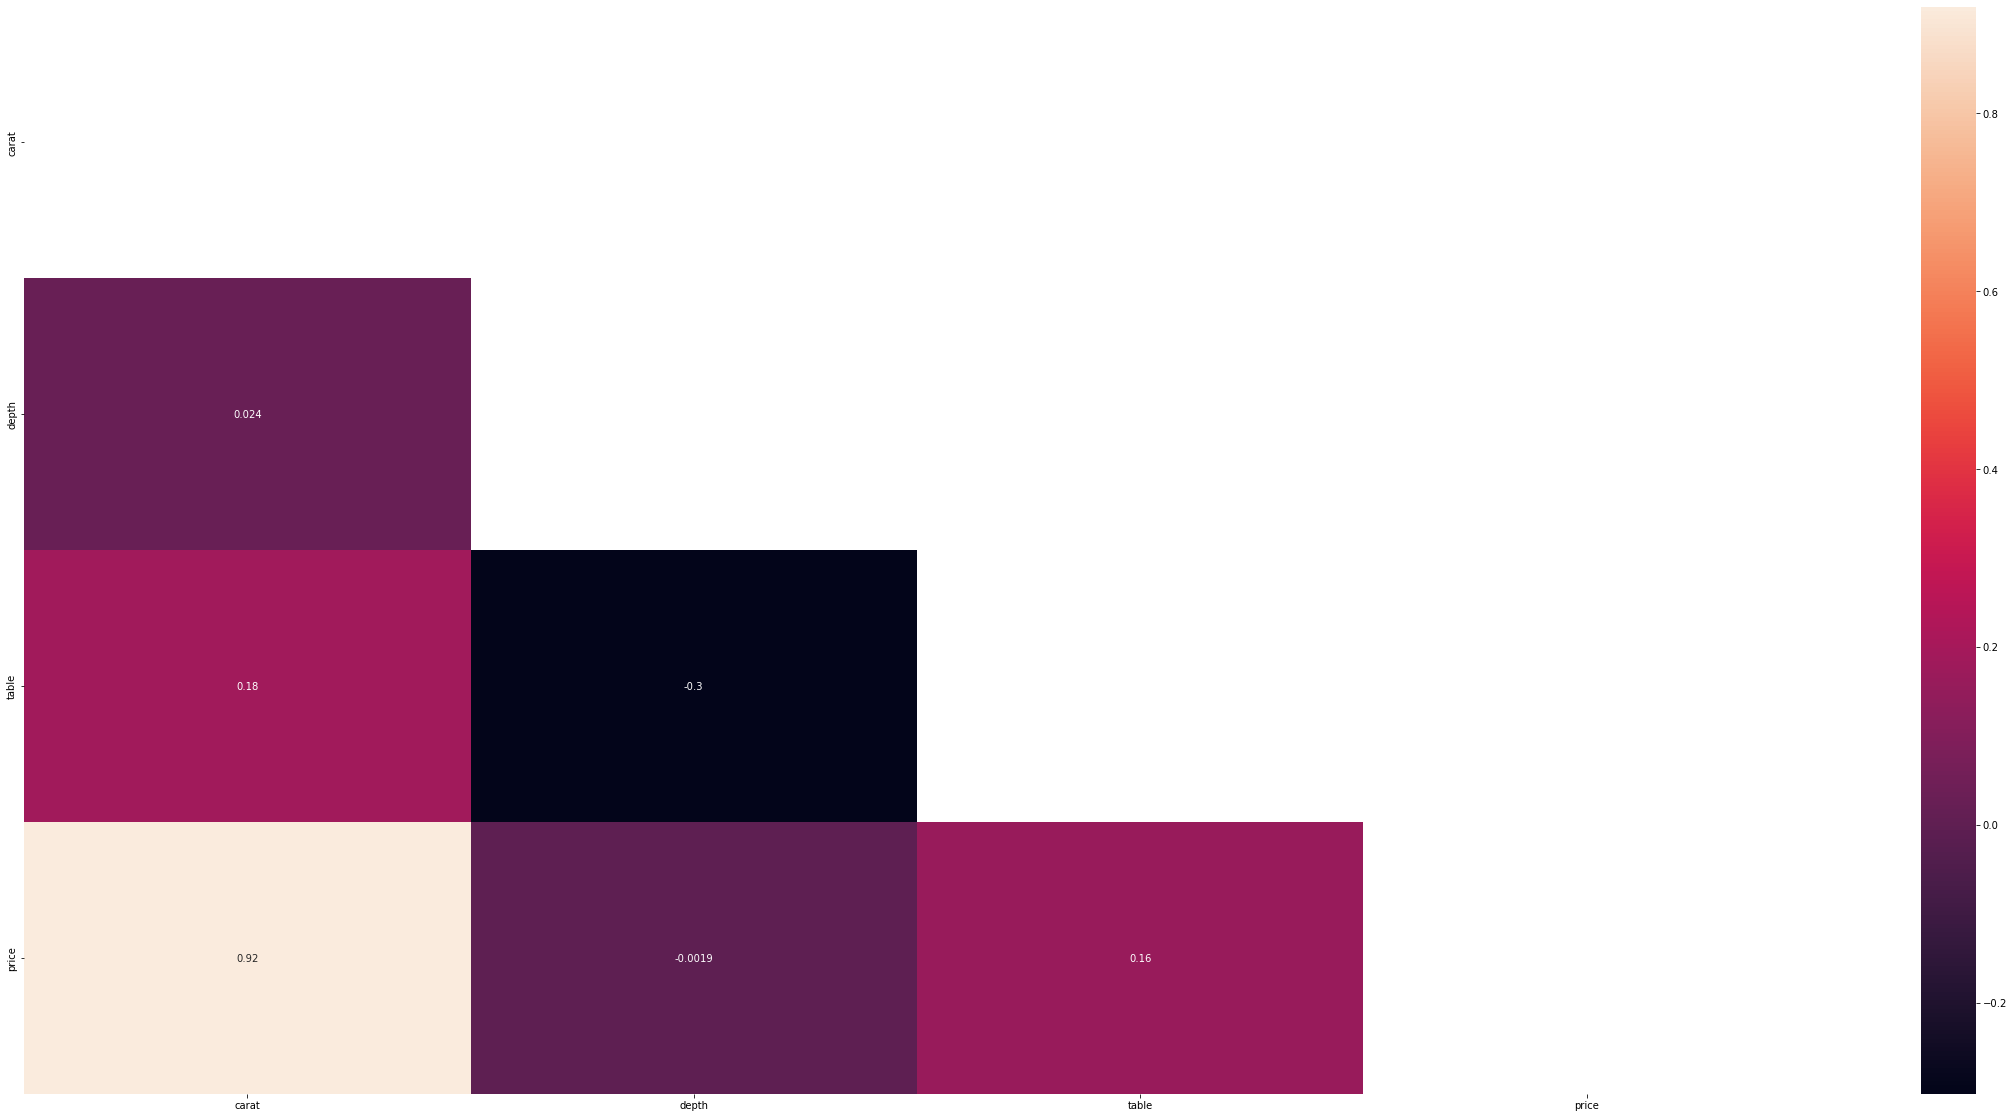

In [90]:
mask = np.triu(np.ones_like(df_depth.corr(), dtype=bool))

fig, ax = plt.subplots(figsize = (40,20))
sns.heatmap(df_depth.corr(), annot = True, mask = mask)
plt.size = (40,40)
plt.show()

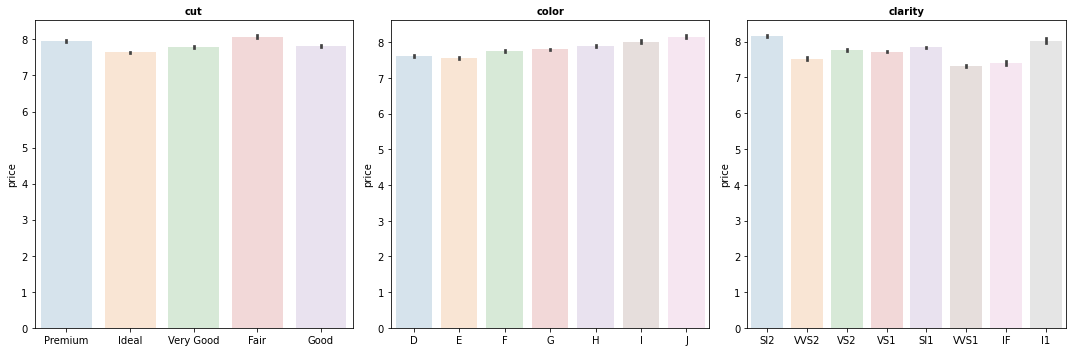

In [102]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))


axes = axes.flat

columnas_cat = df_depth.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.barplot(
        data = df_depth,
        x = colum,
        y = 'price',
        #hue= 'color',
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.tight_layout();

In [89]:
df_depth.to_csv('data/train_cleaned.csv',index=False)

In [ ]:
import pickle
def save_scaler(amount, filename = "scaler.pkl"): 
    with open(filename, "wb") as f:
        pickle.dump(amount, f)

save_scaler(scaler,filename="standard_scaler.pkl")